# Linear Regression

## 고객 매출액 예측

* 고객 구매 데이터 기반
* Linear Regression 모델 생성
* 고객 1인당 구매액 예측

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split #모델 생성시 data selection 및 training에 이용
from sklearn.linear_model import LinearRegression # Linear Regression을 이용 모델 생성
from scipy.stats.stats import pearsonr 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read data

df = pd.read_csv('data/wrangled_transaction_data_result.csv', index_col='CustomerID')
df.head()

,2010 revenue,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,2011 revenue
CustomerID,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
12383.0,600.72,8.0,8.0,1.0,600.72,1249.84


In [3]:
# the number of columns and rows

df.shape

(738, 6)

In [4]:
# correlation between data parameters

df.corr()

,2010 revenue,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,2011 revenue
2010 revenue,1.000000,0.109692,-0.254964,0.504438,0.779401,0.548234
days_since_first_purchase,0.109692,1.000000,0.641574,0.327502,-0.074321,0.061743
days_since_last_purchase,-0.254964,0.641574,1.000000,-0.398268,-0.054051,-0.171294
number_of_purchases,0.504438,0.327502,-0.398268,1.000000,-0.012466,0.355751
avg_order_cost,0.779401,-0.074321,-0.054051,-0.012466,1.000000,0.357384
2011 revenue,0.548234,0.061743,-0.171294,0.355751,0.357384,1.000000


In [5]:
# separate data
# correlation 높은 data parameter

X = df[['2010 revenue', 'days_since_last_purchase', 'number_of_purchases', 'avg_order_cost']]
y = df['2011 revenue']

In [6]:
X.head()

,2010 revenue,days_since_last_purchase,number_of_purchases,avg_order_cost
CustomerID,,,,
12347.0,711.79,23.0,1.0,711.79
12348.0,892.80,14.0,1.0,892.80
12370.0,1868.02,13.0,2.0,934.01
12377.0,1001.52,10.0,1.0,1001.52
12383.0,600.72,8.0,1.0,600.72


In [7]:
# mean value

X.mean()

2010 revenue                499.801220
days_since_last_purchase     18.964770
number_of_purchases           1.342818
avg_order_cost              374.261581
dtype: float64

In [8]:
# median value

X.median()

2010 revenue                337.48
days_since_last_purchase     18.00
number_of_purchases           1.00
avg_order_cost              301.67
dtype: float64

In [9]:
y.head()

CustomerID
12347.0    3598.21
12348.0     904.44
12370.0    1677.67
12377.0     626.60
12383.0    1249.84
Name: 2011 revenue, dtype: float64

In [10]:
# Data selection & split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [11]:
X_train.shape

(553, 4)

In [12]:
X_test.shape

(185, 4)

In [13]:
# Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# coefficient(계수 - 기울기)

model.coef_

array([  5.78799016,   7.47737544, 336.60769871,  -2.0558923 ])

In [15]:
# intercept(절편)

model.intercept_

264.8693265705997

In [16]:
# prediction for each cumstomer's spending according to generated model

single_customer = pd.DataFrame({'2010 revenue' : [1000],
                              'days_since_last_purchase' : [20],
                              'number_of_purchases' : [2],
                              'avg_order_cost' : [500]})

model.predict(single_customer)

array([5847.67624446])

In [17]:
# prediction of X_test

model.predict(X_test)

array([ 1791.28756931,  7673.95188849,  1962.86750595,  1444.71830726,
        2863.62335671,  2312.00734987,  1041.14242409,  2097.18348986,
        1595.47979234,  1170.84378637,  3599.96972021,  4623.54226298,
        4152.26262443,  2352.57316478,  7253.59940844,  1804.19693931,
        2256.50009311,  1067.52835598,  1447.91264284,  2947.02171237,
        2134.88642165,  1184.79974352,  1982.98129526,  6050.47170211,
        1061.29575255,  2804.4020251 ,  1425.89326545,  7330.31832782,
        1368.91287446,  4391.72083877,  2653.02452948,  2572.81952824,
        3147.35185295,  4427.07639059,  2323.87111405,  2242.05034918,
        3063.37965104,  2479.02982009,  1216.25689216,  1856.46748474,
        2294.11520322,  1722.58682258,  1995.1830371 ,  1316.43736034,
        1878.41222017,  2790.58965671,  1398.57209093,  2344.90696628,
        3253.50589589,  2198.0115944 ,  1148.11974673,  1629.61308989,
        7462.47234346,  2192.64833502,  2756.14582216,  3741.18932993,
      

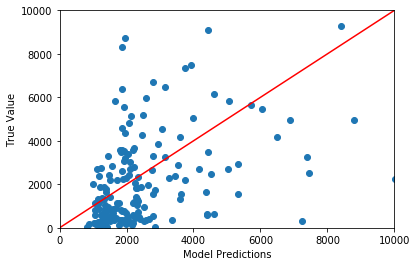

In [18]:
# Plotting

plt.scatter(model.predict(X_test), y_test)
plt.xlim(0, 10000)
plt.ylim(0, 10000)
plt.plot([0, 10000], [0, 10000], 'k-', color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.show()

In [19]:
# Pearson Score
# (pearson correlation coefficient(상관계수), p-value)

pearsonr(model.predict(X_test), y_test)

(0.6125740076680493, 1.9340020674636148e-20)

# Logistic Regression

## 시험 성적 데이터 기반  두 과목 성적과 Pass 예측

* Linear Regression
* Logistic Regression

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [21]:
# read data

data = pd.read_csv('data/exam_score_data.csv', header=None)
data.head(10)

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [22]:
# data tpyes

data.dtypes

0    float64
1    float64
2      int64
dtype: object

In [23]:
# separate data

X = data[[0, 1]]
y = data[[2]].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [24]:
# Linear Regression Modeling

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# predict X_test

linear.predict(X_test)

array([[ 1.22083091],
       [ 1.17230948],
       [ 0.94507443],
       [ 0.35609403],
       [ 1.02375539],
       [ 0.8016655 ],
       [ 1.09434499],
       [ 1.05191921],
       [ 0.27273707],
       [ 0.40180325],
       [ 0.84618988],
       [ 1.06105956],
       [ 1.06873208],
       [ 0.35054279],
       [ 1.19900775],
       [ 0.51962942],
       [ 0.16641549],
       [ 1.01137892],
       [ 0.30865603],
       [ 0.30361639],
       [ 0.67983531],
       [-0.20582051],
       [ 0.34259952],
       [ 0.45063479],
       [ 0.74903637],
       [ 0.29760594],
       [ 0.43242695],
       [ 0.97129797],
       [ 0.50748505],
       [ 0.98267487]])

In [26]:
# check value
y_test[2].values.astype(int)

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1])

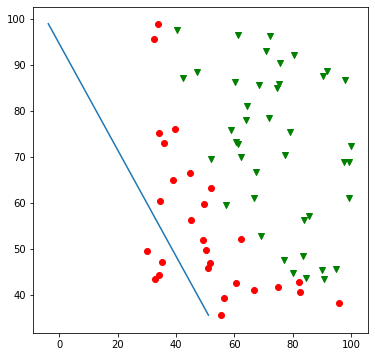

In [27]:
# plotting

color = ['red', 'green']
y_color = [color[i] for i in y_train[2].values.astype(int)]
marker = ['o', 'v']
y_marker = [marker[i] for i in y_train[2].values.astype(int)]

plt.figure(figsize=(6, 6))
for _m, c, _x, _y in zip(y_marker, y_color, X_train[0].values, X_train[1].values):
    plt.scatter(_x, _y, c=c, marker=_m)
    
plt.plot((-linear.coef_[0][1] * np.array((min(X_train[1].values), max(X_train[1].values))) - linear.intercept_[0]) / 
        linear.coef_[0][0], np.array((min(X_train[1].values), max(X_train[1].values))))
plt.show()

In [30]:
# Logistic Regression Model & Data Fitting

logit = LogisticRegression()
logit.fit(X_train, y_train[2].values.astype(int))

C:\Users\ba4ws\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# prediction by LR (0 or 1)

logit.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
# check value

y_test[2].values.astype(int)

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1])

In [33]:
# intercept(절편)

logit.intercept_[0]

-3.0556235063777777

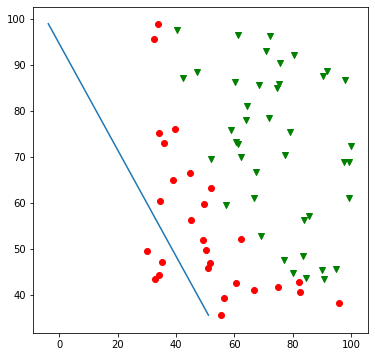

In [34]:
# plotting

color = ['red', 'green']
y_color = [color[i] for i in y_train[2].values.astype(int)]
marker = ['o', 'v']
y_marker = [marker[i] for i in y_train[2].values.astype(int)]

plt.figure(figsize=(6, 6))
for _m, c, _x, _y in zip(y_marker, y_color, X_train[0].values, X_train[1].values):
    plt.scatter(_x, _y, c=c, marker=_m)
    
plt.plot((-linear.coef_[0][1] * np.array((min(X_train[1].values), max(X_train[1].values))) - linear.intercept_[0]) / 
        linear.coef_[0][0], np.array((min(X_train[1].values), max(X_train[1].values))))
plt.show()

# KNN(K-Nearest Neighbor)

In [35]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score # parameter tunning 

In [36]:
# read data

glass_data = pd.read_csv('data/glass_class_data.csv')
glass_data.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [37]:
# the number of columns and row

glass_data.shape

(214, 10)

In [38]:
# separate data

x = glass_data.drop('Type', axis=1)
y = glass_data['Type']

In [40]:
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [41]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [43]:
# separate training and testing dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=25)

In [44]:
x_train.shape

(149, 9)

In [46]:
x_test.shape

(65, 9)

In [47]:
# KNN Model k = 3

knn = KNeighborsClassifier(n_neighbors=3)

In [48]:
# fitting trained data to KNN Model

knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [50]:
# prediction

y_predict = knn.predict(x_test)
y_predict

array([1, 1, 1, 1, 5, 5, 2, 1, 6, 7, 2, 7, 5, 1, 2, 2, 1, 3, 1, 2, 2, 2,
       2, 2, 2, 2, 6, 2, 7, 1, 1, 1, 7, 1, 7, 3, 7, 2, 1, 1, 2, 2, 7, 2,
       2, 2, 3, 1, 1, 1, 7, 1, 1, 1, 6, 1, 1, 1, 1, 7, 1, 1, 7, 1, 3],
      dtype=int64)

In [51]:
# confusion Matrix

confusion_matrix = confusion_matrix(y_test, y_predict)
confusion_matrix

array([[18,  2,  3,  0,  0,  0],
       [ 6, 15,  1,  1,  2,  0],
       [ 2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  1,  1],
       [ 1,  0,  0,  0,  0,  9]], dtype=int64)

In [52]:
# accuracy score

accuracy_score(y_test, y_predict)

0.6923076923076923

In [53]:
# creating list

c_list = list(range(1, 50))

In [54]:
# cv scores array 생성

cv_score = []

In [55]:
# cross validation 반영한 KNN

for k in c_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_score.append(scores.mean())

C:\Users\ba4ws\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\ba4ws\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\ba4ws\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\ba4ws\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 6 members, which is too few. The

C:\Users\ba4ws\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\ba4ws\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\ba4ws\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\ba4ws\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 6 members, which is too few. The

In [56]:
cv_score

[0.7125289987789988,
 0.64247557997558,
 0.6539239926739927,
 0.6387789987789988,
 0.6076465201465202,
 0.622330586080586,
 0.6102197802197802,
 0.5911065323565324,
 0.5812774725274725,
 0.6236660561660562,
 0.6015613553113554,
 0.5869780219780221,
 0.5796108058608058,
 0.5735851648351649,
 0.5732417582417584,
 0.57482905982906,
 0.5739362026862028,
 0.57482905982906,
 0.5810790598290599,
 0.5676862026862027,
 0.5676862026862027,
 0.57482905982906,
 0.57482905982906,
 0.5609401709401709,
 0.5594978632478631,
 0.5588034188034189,
 0.557361111111111,
 0.5427777777777777,
 0.530079365079365,
 0.5356349206349206,
 0.5433272283272282,
 0.5258592796092796,
 0.5207997557997558,
 0.5187164224664225,
 0.5063079975579976,
 0.5051907814407814,
 0.5077503052503053,
 0.5081669719169719,
 0.5144169719169719,
 0.5033318070818071,
 0.49041514041514045,
 0.48029609279609276,
 0.4559050671550671,
 0.4196871184371185,
 0.45140720390720396,
 0.4233577533577534,
 0.4243833943833944,
 0.4264667277167278,
 0

In [57]:
# Misclassification Error w/MSE

MSE = [1 - x for x in cv_score]
MSE

[0.2874710012210012,
 0.35752442002442,
 0.3460760073260073,
 0.3612210012210012,
 0.3923534798534798,
 0.377669413919414,
 0.3897802197802198,
 0.40889346764346757,
 0.4187225274725275,
 0.3763339438339438,
 0.39843864468864465,
 0.41302197802197793,
 0.4203891941391942,
 0.42641483516483514,
 0.4267582417582416,
 0.42517094017094004,
 0.4260637973137972,
 0.42517094017094004,
 0.41892094017094006,
 0.43231379731379727,
 0.43231379731379727,
 0.42517094017094004,
 0.42517094017094004,
 0.4390598290598291,
 0.4405021367521369,
 0.4411965811965811,
 0.442638888888889,
 0.4572222222222223,
 0.46992063492063496,
 0.4643650793650794,
 0.45667277167277176,
 0.4741407203907204,
 0.4792002442002442,
 0.48128357753357753,
 0.4936920024420024,
 0.49480921855921856,
 0.4922496947496947,
 0.4918330280830281,
 0.4855830280830281,
 0.49666819291819286,
 0.5095848595848596,
 0.5197039072039072,
 0.5440949328449329,
 0.5803128815628815,
 0.5485927960927961,
 0.5766422466422466,
 0.5756166056166057,
 

In [58]:
# Optimal K

opt_k = c_list[MSE.index(min(MSE))]
print('The optimal neighbors number is %d' %opt_k)

The optimal neighbors number is 1


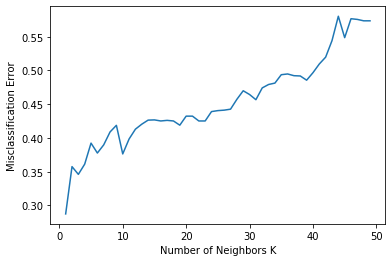

In [59]:
# Plotting

plt.plot(c_list, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()